Введите цифру от 0 до 9 (или 'exit' для выхода): 2


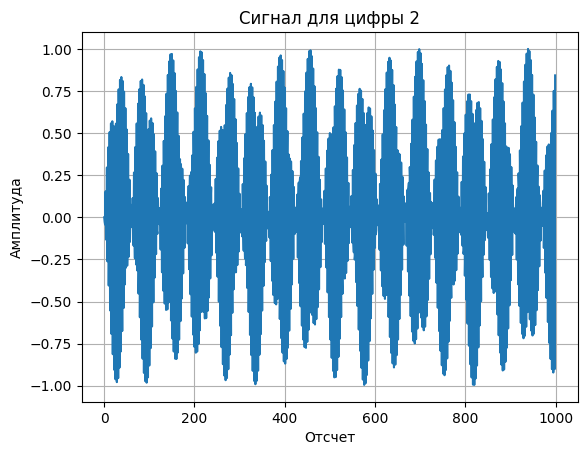

In [ ]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Частоты для DTMF сигналов
frequencies = {
    '0': (1336, 941),
    '1': (1209, 697),
    '2': (1336, 697),
    '3': (1477, 697),
    '4': (1209, 770),
    '5': (1336, 770),
    '6': (1477, 770),
    '7': (1209, 852),
    '8': (1336, 852),
    '9': (1477, 852)
}

# Параметры сигнала
duration = 0.5  # время воспроизведения в секундах
fs = 2*1000     # частота дискретизации в Гц

def generate_tone(digit):
    if digit not in frequencies:
        raise ValueError("Неверная цифра. Введите цифру от 0 до 9.")
    
    f1, f2 = frequencies[digit]
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    # Генерация синусоидальных сигналов
    tone1 = 0.5 * np.sin(2 * np.pi * f1 * t)
    tone2 = 0.5 * np.sin(2 * np.pi * f2 * t)
    
    # Суммируем два сигнала
    signal = tone1 + tone2
    
    return signal

def play_tone(digit):
    signal = generate_tone(digit)
    sd.play(signal, fs)
    sd.wait()  # Ждем завершения воспроизведения

def plot_tone(digit):
    signal = generate_tone(digit)
    plt.plot(signal)
    plt.title(f"Сигнал для цифры {digit}")
    plt.xlabel("Отсчет")
    plt.ylabel("Амплитуда")
    plt.grid()
    plt.show()

# Основная часть программы
if __name__ == "__main__":
    while True:
        user_input = input("Введите цифру от 0 до 9 (или 'exit' для выхода): ")
        
        if user_input.lower() == 'exit':
            break
        
        if len(user_input) == 1 and user_input in frequencies:
            play_tone(user_input)
            plot_tone(user_input)  # Построение графика для каждой цифры
        elif len(user_input) > 1:
            for digit in user_input:
                if digit in frequencies:
                    play_tone(digit)
                else:
                    print("Некорректный ввод. Введите только цифры от 0 до 9.")
        else:
            print("Некорректный ввод. Пожалуйста, введите цифру от 0 до 9.")